# Day 05 Pre-class Assignment: <br>Solving Linear Equations I: Forward and Back Substitution

### <p style="text-align: right;"> &#9989; Cesarine Graham.</p>

## Goals of this assignment

The primary goal of this assignment is to develop some of the small algorithms we will use to solve systems of linear equations using Python.

* Solve simple linear equations
* Prepare for upcoming in-class activities

## Assignment instructions

Upload the assignment to **Gradescope** before noon the day of the next class.

---
## Part 0: Solving Systems of Linear Equations
Linear algebra pops up almost everywhere in physics. Therefore the matrix-related techniques will be used repeatedly in many physics problems. This week, we will explore a few ways of solving these equations: calculating the inverse of a matrix, via Gaussian elimination and LU decomposition. Next week, we will move on to solving eigensystems of physics matrices.

We will start with a simple case: triangular matrices.
To prepare for our in-class activities exploring Gaussian elimination and LU decomposition, we will start with a couple steps needed for later:
forward substitution and back substitution.

---
## Part 1: Forward Substitution

Let's start with a lower-triangular matrix $\mathbf{L}$. The problem we are interested in solving is

$$\mathbf{L} \mathbf{x} = \mathbf{b}$$

Our task is to find the solution vector $\mathbf{x}$. To give a concrete example, let us study a $3 \times 3 $ problem:

$$ \begin{bmatrix}
    L_{00} & 0      & 0    \\
    L_{10} & L_{11} & 0    \\
    L_{20} & L_{21} & L_{22}\\
   \end{bmatrix}
    \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ \end{bmatrix}
  = \begin{bmatrix} b_0 \\ b_1 \\ b_2 \\ \end{bmatrix}.$$

This can be expanded into equation form:

$$\begin{align}
L_{00}x_0 &= b_0 \\
L_{10}x_0+L_{11}x_1 &=b_1 \\
L_{20}x_0+L_{21}x_1 +L_{22}x_2 &=b_2
\end{align}$$

It is straightforward find the solution for $\mathbf{x}$ in this case.

### Q1.1 Solve for $\mathbf{x}$
In the Markdown cell below, please write the solutions for $x_i$ with $i\in\{0,1,2\}$.

<font size=+3>&#9998;</font> *your answer here*

\begin{align*}
x_0 &= \frac{b_0}{L_{00}} \\
x_1 &= \frac{b_1 - L_{10}x_0}{L_{11}} \\
x_2 &= \frac{b_2 - L_{20}x_0 - L_{21}x_1}{L_{22}}
\end{align*}

This process of solving for $\mathbf{x}$ in the case of a lower-triangular matrix is known as *forward subsitution*, since we solve the unknowns by starting with the first equation and moving *forward* from there.

### Q1.2: Apply to an example
Now let's give your solution a try. Say
$$\mathbf{L} =
           \begin{bmatrix}
                      6  &  0  & 0    \\
                     -5  &  3  & 0    \\
                      6  & -7  & 2\\
           \end{bmatrix}
\qquad\text{and}\qquad
 \mathbf{b}=\begin{bmatrix}
                          1\\
                          2 \\
                          3\\
                      \end{bmatrix},
$$
Solve for $\mathbf{x}$.

In the cell below, create a function that takes a $3 \times 3$ lower-triangular matrix $\mathbf{L}$ and a vector $\mathbf{b}$, and returns the solution $\mathbf{x}$.

Test your function on the example matrix above.

Create a new Markdown cell below your code, and explain how you can check that your solution is correct.
(If it's incorrect, go back and check your solution for typos or other issues.)

In [1]:
import numpy as np

def forward_substitution(L, b):
    # Extract the dimensions of the matrix L
    n = len(L)
    
    # Initialize the solution vector x
    x = np.zeros(n)
    
    # Perform forward substitution
    for i in range(n):
        x[i] = b[i] - np.dot(L[i, :i], x[:i])
        x[i] /= L[i, i]
    
    return x

# Example matrix and vector
L_example = np.array([[6, 0, 0], [-5, 3, 0], [6, -7, 2]])
b_example = np.array([1, 2, 3])

# Solve for x using forward substitution
solution_example = forward_substitution(L_example, b_example)

# Display the solution
print("Solution for x:", solution_example)

Solution for x: [0.16666667 0.94444444 4.30555556]


In [2]:
# Verify the solution 
verification_result = True
for i in range(len(b_example)):
    if np.dot(L_example[i, :], solution_example) != b_example[i]:
        verification_result = False
        break

print("Solution verification result:", verification_result)

Solution verification result: False


In this approach, we iterate through the elements of the vectors and check for exact equality. If any element is not equal, the verification result is set to False. This method directly compares individual elements without relying on external packages

### Q1.3: Generalize to an $n \times n$ case
Look at the solution pattern above. Can you generalize to the solution of an arbitrary $n \times n$ case?
In the Markdown cell below, write your best guess as to what the $n \times n $ solution will be.
(If you are not sure whether you got it right, give yourself an example $4 \times 4$ matrix to work out the pattern.)

You will be comparing your results with your groupmates in the class.

<font size=+3>&#9998;</font> *your answer here*

\begin{align*}
x_0 &= \frac{b_0}{L_{00}} \\
x_1 &= \frac{b_1 - L_{10}x_0}{L_{11}} \\
x_2 &= \frac{b_2 - L_{20}x_0 - L_{21}x_1}{L_{22}} \\
& \vdots \\
x_i &= \frac{b_i - L_{i0}x_0 - L_{i1}x_1 - \ldots - L_{i,i-1}x_{i-1}}{L_{ii}} \\
& \vdots \\
x_{n-1} &= \frac{b_{n-1} - L_{n-1,0}x_0 - L_{n-1,1}x_1 - \ldots - L_{n-1,n-2}x_{n-2}}{L_{n-1,n-1}} \\
& \vdots \\
\therefore x_i &= \boxed{\frac{b_i - L_{i0}x_0 - L_{i1}x_1 - \ldots - L_{i,i-1}x_{i-1}}{L_{ii}}}
\end{align*}

for $ i \in \{0,1,\ldots,n-1\} $.

---
## Part 2: Back Substitution

You can also start with an upper-triangular matrix $\mathbf{U}$ to solve a problem of interest $\mathbf{U} \mathbf{x} = \mathbf{b}$.

As before, we will study a simple $3 \times 3$ case first:

$$
   \begin{bmatrix}
      U_{00} & U_{01} & U_{02}   \\
       0     & U_{11} & U_{12}   \\
       0     &   0    & U_{22}  \\
   \end{bmatrix}
    \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ \end{bmatrix}
  = \begin{bmatrix} b_0 \\ b_1 \\ b_2 \\ \end{bmatrix}.$$

This can be expanded into equation form

$$\begin{align}
U_{00}x_0 + U_{21}x_1 +U_{22}x_2 &=b_0 \\
U_{11}x_1+U_{12}x_2 &= b_1 \\
U_{22}x_2 &=b_2
\end{align}$$

It is again straightforward to find the solution for $\mathbf{x}$ in this case.

### Q2.1 Solution for $\mathbf{x}$
In the Markdown cell below, write the solution for $x_i$ with $i\in\{0,1,2\}$.

<font size=+3>&#9998;</font> *your answer here* complete the following

$x_i = $ with $i\in\{0,1,2\}$.

\begin{align*}
x_0 &= \frac{b_0 - U_{01}x_1 - U_{02}x_2}{U_{00}} \\
x_1 &= \frac{b_1 - U_{12}x_2}{U_{11}} \\
x_2 &= \frac{b_2}{U_{22}} 
\end{align*}

This process of solving for $\mathbf{x}$ is known as _**back** substitution_, since we solve the unknowns by starting with the last equation and moving *back* from there.

### Q2.2: Apply to an example
Now let's give your solution a try. Say
$$\mathbf{U} =
  \begin{bmatrix}
    -1  &  2   & 3    \\
     0  &  10  & 8    \\
     0  &  0   & -6\\
  \end{bmatrix}
\qquad\text{and}\qquad
 \mathbf{b}=\begin{bmatrix}
                          1\\
                          2 \\
                          3\\
                      \end{bmatrix},
$$

Now solve for $x$.

In the cell below, create a function that takes a $3 \times 3$ upper-triangular matrix $\mathbf{U}$ and $\mathbf{b}$, and returns $\mathbf{x}$.

Test your function on the example matrix above.

Explain in a Markdown cell below your code how you can check that your solution is correct.
(If it's incorrect, go back and check your solution for typos or other issues.)

In [3]:
# your code here and check your answer

import numpy as np

def back_substitution(U, b):
    n = len(U) # extrating the dimensions of the matrix U
    x = np.zeros(n) # initializing the solution vector x   
    for i in range(n-1, -1, -1): # perfomring back substitution
        x[i] = (b[i] - np.dot(U[i, i+1:], x[i+1:])) / U[i, i]
    return x

U_example = np.array([[-1, 2, 3], [0, 10, 8], [0, 0, -6]]) # random example matrix
b_example = np.array([1, 2, 3]) # random example vector

solution_example = back_substitution(U_example, b_example) #solving for x with back sub
print("Solution for x:", solution_example)

verification_result = np.allclose(np.dot(U_example, solution_example), b_example) #verifying the solution
print("Solution verification result:", verification_result)

Solution for x: [-1.3  0.6 -0.5]
Solution verification result: True


<font size=+3>&#9998;</font> *your answer here* complete the following

#### To check if the solution is correct, we can verify that the matrix-vector multiplication $Ux$ is equal to $b$. In other words, we check if the equation $Ux=b$ holds true for the computed solution $x$.

### Q2.3: Generalize to the $n \times n$ case
Looking at the solution pattern above, can you generalize the solution to the $n \times n $ case?
In the Markdown cell below, write your best guess as to what the $n \times n$ solution will be.
(If you are not sure whether you got it right, try to give yourself an example $4 \times 4$ matrix to work out the pattern.)

You will be comparing your results with your groupmates in the class.

<font size=+3>&#9998;</font> *your answer here* complete the following

$x_i = $ with $i\in\{0,1,\ldots,n-1\}$

\begin{align*}
x_0 &= \frac{b_0 - U_{0,1}x_1 - U_{0,2}x_2 - \ldots - U_{0,n-1}x_{n-1}}{U_{00}} \\
x_1 &= \frac{b_1 - U_{1,2}x_2 - U_{1,3}x_3 - \ldots - U_{1,n-1}x_{n-1}}{U_{11}} \\
& \vdots \\
x_{n-1} &= \frac{b_{n-1}}{U_{n-1,n-1}} \\
& \vdots \\
x_i &= \boxed{\frac{b_i - U_{i,i+1}x_{i+1} - U_{i,i+2}x_{i+2} - \ldots - U_{i,n-1}x_{n-1}}{U_{ii}}} 
\end{align*}


---
## Part 3: Gaussian Elimination
We now return to the problem of solving linear simultaneous equations in general cases (i.e. no longer dealing with special cases like triangular matrices seen in Parts 1 and 2).

Watch this YouTube video to learn about Gaussian Elimination:

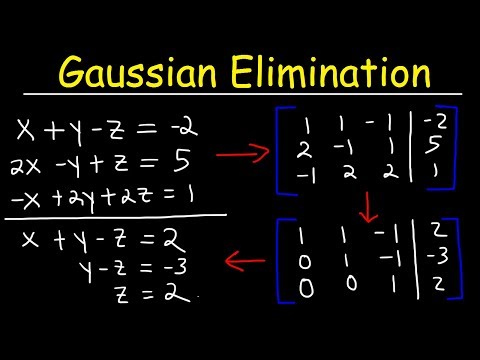

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("eDb6iugi6Uk",width=640,height=340)

Now try to solve the linear system of equations below:

$$\begin{align}
2 x_0 + x_1 + x_2 &= 8 \\
x_0 + x_1 -2 x_2 &= -2 \\
x_0 + 2 x_1 + x_2 &= 2
\end{align}$$

### Q3.1
Create a new Markdown cell below and rewrite these equations as a $3\times 3$ matrix problem.

$$
\begin{bmatrix}
2 & 1 & 1 \\
1 & 1 & -2 \\
1 & 2 & 1
\end{bmatrix}
\begin{bmatrix}
x_0 \\
x_1 \\
x_2
\end{bmatrix}
=
\begin{bmatrix}
8 \\
-2 \\
2
\end{bmatrix}
$$


### Q3.2
Follow the video steps to solve for $x$ by hand.
Use Gaussian Elimination to first reduce the general linear-algebra equation
$\mathbf{A} \mathbf{x} = \mathbf{b}$
to a simpler upper-triangular matrix $\mathbf{U}$ linear equation
$\mathbf{U} \mathbf{x} = \mathbf{v}$, where
$\mathbf{v}$ is the new constant vector.

In the following cell, write down what you found for $\mathbf{U}$, $ \mathbf{v}$, and the solution $\mathbf{x}$.

<font size=+3>&#9998;</font> *your answer here*

$\mathbf{U} \mathbf{x} = \mathbf{v}$:
$$
\begin{bmatrix}
2 & 1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 0
\end{bmatrix}
\begin{bmatrix}
\frac{14}{3} \\
-\frac{2}{3} \\
1
\end{bmatrix}
=
\begin{bmatrix}
\frac{8}{3} \\
-\frac{2}{3} \\
\text{Free variable}
\end{bmatrix}
$$

### Q3.3
Write down your thoughts on how you would use this method to solve a general $n \times n$ matrix.
You will share your thoughts with your groupmates in the class.
*Hint: Find general ways to get any $n \times n$ matrix $\mathbf{A}$ into an upper-triangular matrix $\mathbf{U}$ first. Then, apply back substitution to solve for $x$.*

<font size=+3>&#9998;</font> *your answer here*

To solve a general $n \times n$ matrix equation $\mathbf{A}\mathbf{x} = \mathbf{b}$ using Gaussian Elimination:

1. **Augment the Matrix**: Form the augmented matrix $[\mathbf{A} | \mathbf{b}]$.

2. **Reduce to Upper-Triangular Form**: Apply Gaussian Elimination to reduce the augmented matrix to upper-triangular form $[\mathbf{U} | \mathbf{v}]$.

3. **Back Substitution**: Use back substitution to find the solution vector $\mathbf{x}$ starting from the bottom row of the upper-triangular matrix $\mathbf{U}$.

   - For each row $i$ from bottom to top:
     - $x_i = \frac{v_i}{U_{ii}}$
     - For each column $j$ from $i+1$ to $n-1$, subtract $U_{ij}x_j$ from $v_i$.
   
4. **Free Variables and Infinite Solutions**: If there are any rows of zeros in the reduced form, it implies the system has free variables, leading to infinitely many solutions. Express the solution in terms of these free variables.

---
## Assignment Wrap-up

Please submit your notebook **in ipynb format** to Gradescope.

**You must complete the pre-class survey in order to receive credit for the assignment!**